In [1]:
import pandas as pd
out = pd.read_csv("part-r-00000.csv")
out.head()

,01/01/2017,242,0
0,01/02/2017\t,291,0
1,01/03/2017\t,301,0
2,01/04/2017\t,334,0
3,01/05/2017\t,437,0
4,01/06/2017\t,373,0


In [2]:
out.columns = ['Date', 'NoOfAccidents', 'BlackShoes']
out.head()

,Date,NoOfAccidents,BlackShoes
0,01/02/2017\t,291,0
1,01/03/2017\t,301,0
2,01/04/2017\t,334,0
3,01/05/2017\t,437,0
4,01/06/2017\t,373,0


In [3]:
out['Date'] = out['Date'].str.replace('\t','') 

In [4]:
out.dtypes
out['BlackShoes'].loc[out['BlackShoes'] > 1] = 1

C:\Users\Karan\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [5]:
q = out.corr(method = 'pearson')
q

,NoOfAccidents,BlackShoes
NoOfAccidents,1.000000,-0.333695
BlackShoes,-0.333695,1.000000


In [6]:
from scipy import stats
a = out.BlackShoes
b = out.NoOfAccidents
stats.pointbiserialr(a, b)

PointbiserialrResult(correlation=-0.33369478091424765, pvalue=2.7973000227341193e-17)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
tips = out
sns.catplot(x="BlackShoes", y="NoOfAccidents", data=tips);

In [8]:
out2 = pd.read_csv("part-r-00000_2.csv")
out2.head()

,01/01/2017,2,0
0,01/02/2017\t,1,0
1,01/03/2017\t,2,0
2,01/04/2017\t,2,0
3,01/05/2017\t,1,0
4,01/06/2017\t,1,0


In [9]:
out2.columns = ['Date', 'DidPoliceInvestigate', 'BlackShoes']
out2.head()

,Date,DidPoliceInvestigate,BlackShoes
0,01/02/2017\t,1,0
1,01/03/2017\t,2,0
2,01/04/2017\t,2,0
3,01/05/2017\t,1,0
4,01/06/2017\t,1,0


In [10]:
out2['Date'] = out2['Date'].str.replace('\t','') 
out2.dtypes

Date                    object
DidPoliceInvestigate     int64
BlackShoes               int64
dtype: object

In [11]:
out2['DidPoliceInvestigate'].loc[out2['DidPoliceInvestigate'] > 1] = 1

C:\Users\Karan\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [12]:
q2 = out2.corr(method = 'pearson')
q2

,DidPoliceInvestigate,BlackShoes
DidPoliceInvestigate,1.000000,-0.341187
BlackShoes,-0.341187,1.000000


In [13]:
from scipy import stats
a = out2.BlackShoes
b = out2.DidPoliceInvestigate
stats.pointbiserialr(a, b)

PointbiserialrResult(correlation=-0.3411868423458805, pvalue=4.858348646157149e-18)

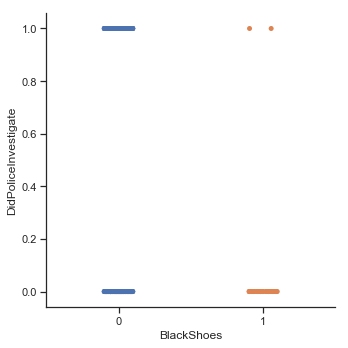

In [14]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="BlackShoes", y="DidPoliceInvestigate", data=out2);

In [15]:
out3 = pd.read_csv("part-r-00000_3.csv")
out3.head()

,01/01/2017,405,0.00
0,01/02/2017\t,494,0.0
1,01/03/2017\t,536,0.0
2,01/04/2017\t,595,0.0
3,01/05/2017\t,767,0.0
4,01/06/2017\t,659,0.0


In [16]:
out3.columns = ['Date', 'NoOfCarsInAccidents', 'PricesOfShoes']

In [17]:
out3['Date'] = out2['Date'].str.replace('\t','') 

In [18]:
#Removing prices of shoes with 0
out3 = out3[(out3 != 0).all(1)]
out3.head()

,Date,NoOfCarsInAccidents,PricesOfShoes
200,14/01/2017,577,19.95
243,16/01/2017,677,189.95
263,17/01/2017,726,60.00
283,18/01/2017,669,69.95
300,19/01/2017,728,107.15


In [19]:
q3= out3.corr(method = 'pearson')
q3
out3['PricesOfShoes'] = out3['PricesOfShoes'].astype(float)
out3['PricesOfShoes'] = out3['PricesOfShoes']*0.90
out3.head()

,Date,NoOfCarsInAccidents,PricesOfShoes
200,14/01/2017,577,17.955
243,16/01/2017,677,170.955
263,17/01/2017,726,54.000
283,18/01/2017,669,62.955
300,19/01/2017,728,96.435


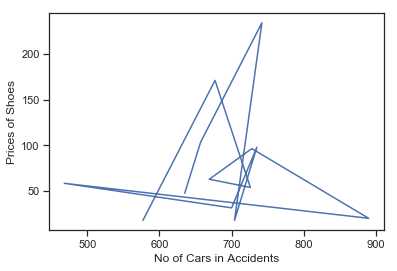

In [20]:
import matplotlib.pyplot as plt
plt.plot(out3['NoOfCarsInAccidents'],out3['PricesOfShoes'])
plt.ylabel('Prices of Shoes')
plt.xlabel('No of Cars in Accidents')
plt.show()

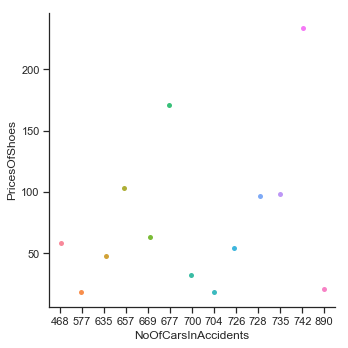

In [21]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="NoOfCarsInAccidents", y="PricesOfShoes", data=out3);